# Image Classification using Logistic Regression and Softmax Regression
### Fashion-MNIST Dataset

## 1. Install Required Libraries
Before starting, you need to install the necessary Python libraries:
- **TensorFlow**: Used for building and training the Softmax Regression model.
- **Scikit-Learn**: Provides the Logistic Regression implementation.
- **Matplotlib**: Used for plotting images and confusion matrices.
```bash
pip install tensorflow scikit-learn matplotlib
```


## 2. Import Necessary Libraries
In this step, we import the necessary libraries to handle data processing, model training, and evaluation.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

## 3. Load and Preprocess the Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training images and 10,000 test images, categorized into 10 classes.


In [45]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [33]:
train_images.shape, train_labels.shape ,test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## 4. Logistic Regression for Image Classification
Logistic Regression is used for multi-class classification. We fit the model using the flattened images.

In [46]:
# Flatten images for Logistic Regression
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

In [34]:
# Create and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(train_images_flat, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# Make predictions on the test set
lr_predictions = lr_model.predict(test_images_flat)

In [36]:
# Evaluate the model
accuracy = accuracy_score(test_labels, lr_predictions)
confusion_mat = confusion_matrix(test_labels, lr_predictions)

In [37]:
print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(confusion_mat)

Logistic Regression Accuracy: 0.84

Confusion Matrix:
[[807   4  17  48   5   2 108   0   9   0]
 [  2 961   1  25   5   0   4   0   2   0]
 [ 19   6 735  12 131   1  86   0  10   0]
 [ 30  12  12 869  29   0  44   0   4   0]
 [  0   2 108  38 756   1  87   0   8   0]
 [  0   0   0   1   0 925   0  51   3  20]
 [129   2 129  40 106   1 568   0  25   0]
 [  0   0   0   0   0  33   0 938   0  29]
 [  7   1   6  10   3   5  21   5 942   0]
 [  0   0   0   0   0  13   0  47   2 938]]


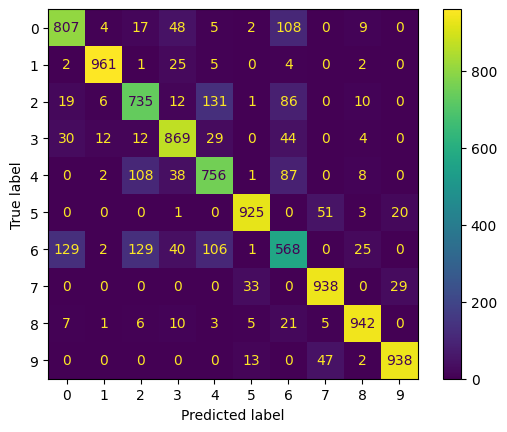

In [38]:
# Generate and plot confusion matrix
cm = confusion_matrix(test_labels, lr_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## 5. Softmax Regression (Using TensorFlow/Keras)
Softmax Regression is implemented using a simple neural network in TensorFlow/Keras.

In [59]:
# Create the Softmax Regression model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7144 - loss: 0.8257 - val_accuracy: 0.8217 - val_loss: 0.5156
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8217 - loss: 0.5116 - val_accuracy: 0.8314 - val_loss: 0.4847
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8289 - loss: 0.4863 - val_accuracy: 0.8392 - val_loss: 0.4709
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8334 - loss: 0.4718 - val_accuracy: 0.8389 - val_loss: 0.4668
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8379 - loss: 0.4658 - val_accuracy: 0.8349 - val_loss: 0.4688
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8374 - loss: 0.4638 - val_accuracy: 0.8312 - val_loss: 0.4726
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8374 - loss: 0.4674 - val_accuracy: 0.8396 - val_loss: 0.4650
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8384 - loss: 0.4576 - 

In [61]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8435 - loss: 0.4462
Test accuracy: 0.84


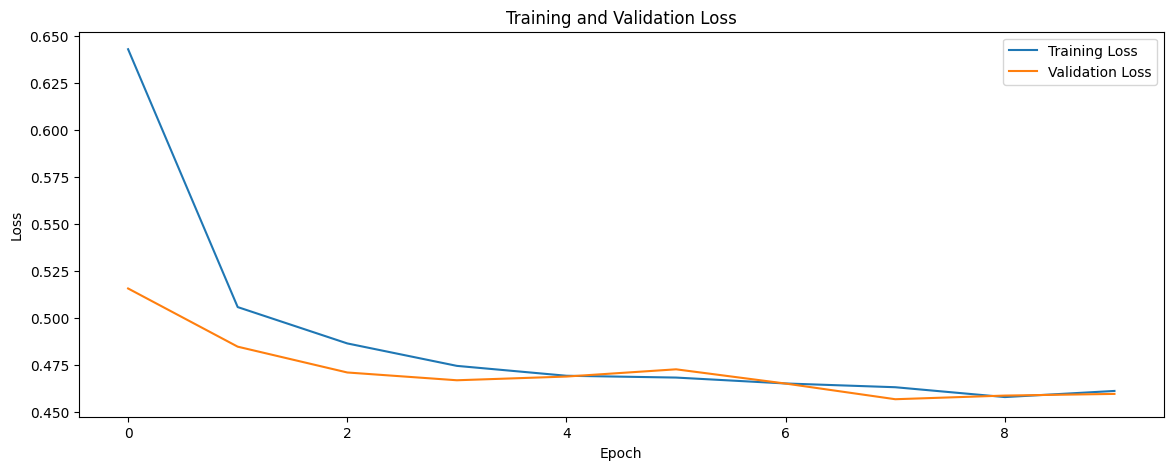

In [62]:
#plot the training and validation loss
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 6. Visualize Model Predictions
We visualize the predictions made by the Softmax Regression model on the test dataset.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


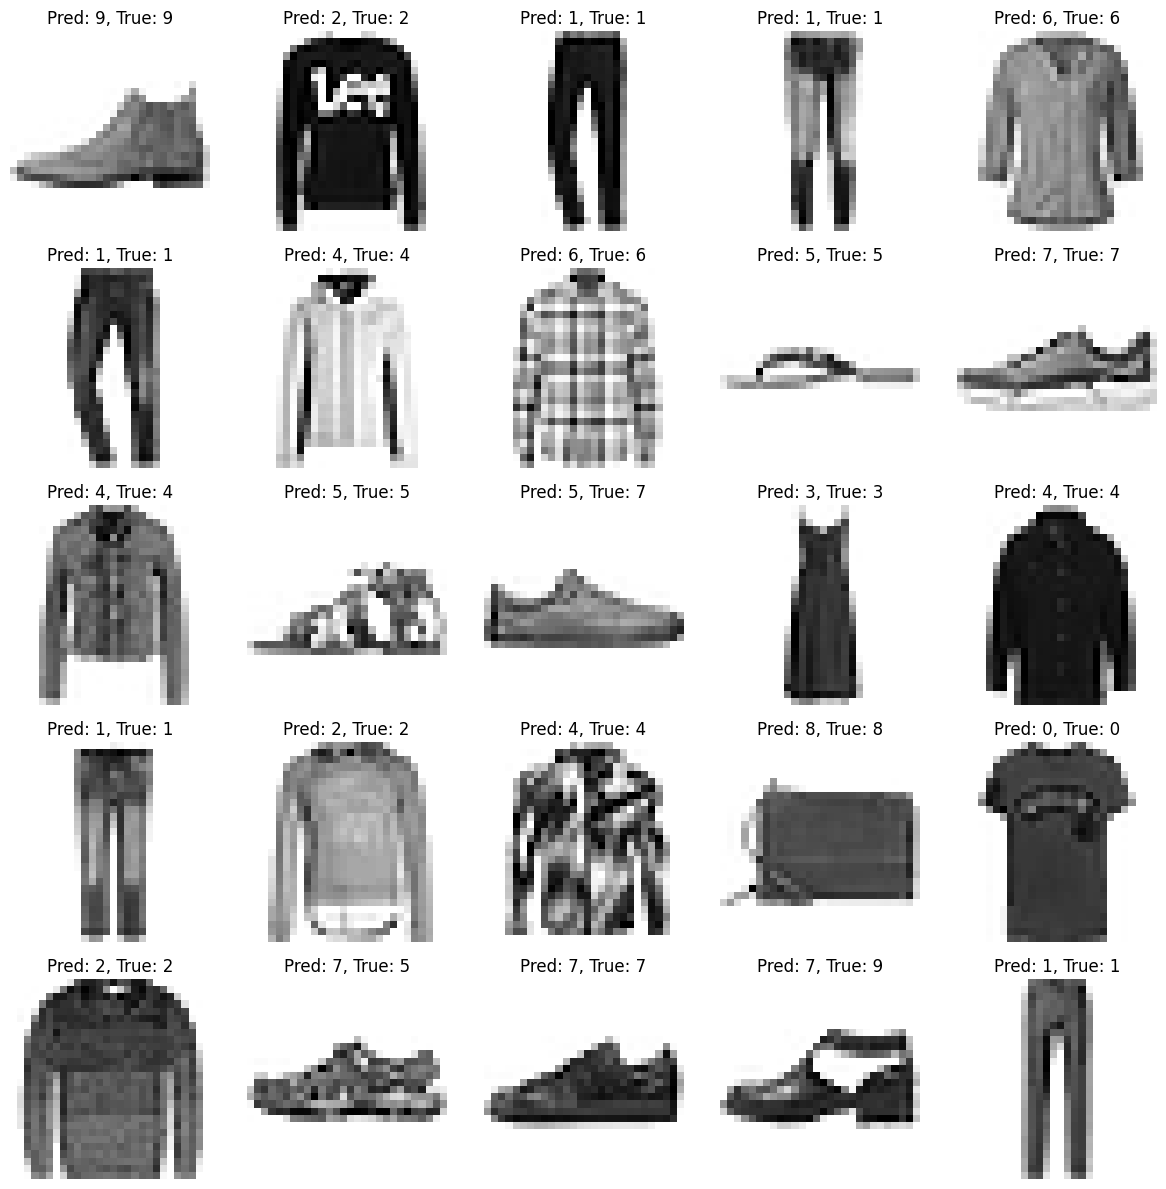

In [63]:
# Make predictions on the test set and visualize them
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
predictions = model.predict(test_images)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary')
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    ax.set_title(f'Pred: {predicted_label}, True: {true_label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Summary
- **Logistic Regression**: You flattened the images and used `LogisticRegression` from Scikit-Learn to classify the Fashion-MNIST dataset.
- **Softmax Regression**: You used TensorFlow/Keras to build a simple neural network with a softmax activation function to classify the same dataset.